In clustering, in difference to supervised learning, we donot have labels. Also here we donot define any test data and train data ratio. Here, I have presented recommendation system for anime on the basis of episodes and ratings.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
# importing rating dataset
rating=pd.read_csv("datasets/rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
# importing dataset having detail of anime
anime=pd.read_csv("datasets/anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Here, collaborative based filtering is done in rating and content based filtering is done in anime

In [9]:
# seeing what are the available genre
items=np.array(anime.genre)
items


array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai', 'Hentai', 'Hentai'], dtype=object)

In [12]:
# seeing which id has genre Drama and puting it to a variable vals
vals=[("Drama" in str(item)) for item in items]

In [15]:
# name of columns
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [16]:
X=anime.loc[vals]

In [18]:
#selecting the only columns we need
X_mod=X[['episodes', 'rating', 'members']]
X_mod

,episodes,rating,members
0,1,9.37,200630
1,64,9.26,793665
5,10,9.15,93351
7,110,9.11,80679
10,24,9.06,456749
...,...,...,...
12017,1,5.72,4981
12071,3,5.61,654
12143,1,5.46,841
12203,2,5.23,4550


In [19]:
X_mod.describe()

,rating,members
count,1977.000000,2016.000000
mean,6.977218,28900.097718
std,0.881088,71701.646529
min,3.330000,20.000000
25%,6.420000,443.750000
50%,7.020000,4079.000000
75%,7.560000,22722.500000
max,9.370000,896229.000000


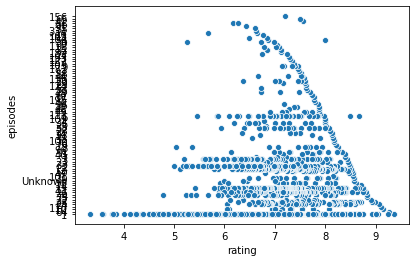

In [26]:
import seaborn as sns
sns.scatterplot(X.rating, X.episodes)